# Optimisation Algorithms
The following code implements Mini-batch Gradient Descent, Gradient Descent with Momentum, RMSprop and Adam.

## 1 Data Loading & Cleaning
The data set contains the credit card debt information of 10,000 customers and whether they defaulted or not.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the data
df = pd.read_csv('Default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
# Scaling and converting to NumPy arrays
df['default']=df['default'].apply(lambda x: 0 if x=='No' else 1)
df['student']=df['student'].apply(lambda x: 0 if x=='No' else 1)

In [4]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [6]:
scaler = StandardScaler()
df[['balance','income']] = scaler.fit_transform(df[['balance','income']])
df

,default,student,balance,income
0,0,0,-0.218835,0.813187
1,0,1,-0.037616,-1.605496
2,0,0,0.492410,-0.131212
3,0,0,-0.632893,0.164031
4,0,0,-0.102791,0.370915
...,...,...,...,...
9995,0,0,-0.255990,1.460366
9996,0,0,-0.160044,-1.039014
9997,0,0,0.020751,1.883565
9998,0,0,1.516742,0.236363


In [7]:
Y = df['default'].to_numpy().reshape(-1,1)
X = df.drop(columns=['default']).to_numpy()

In [8]:
print("Shape of Y:",Y.shape)
print("Shape of X:",X.shape)

Shape of Y: (10000, 1)
Shape of X: (10000, 3)


In [9]:
X = X.T
Y = Y.T

print("Shape of Y:",Y.shape)
print("Shape of X:",X.shape)

Shape of Y: (1, 10000)
Shape of X: (3, 10000)


## 2 Training a Deep Neural Network Using Gradient Descent
The following code implements backpropagation to train a deep neural network of 2 hidden layers with 4 neurons in each hidden layer.

In [10]:
# Initialising the paramaters of the neural network with Xavier initialisation
W = [np.random.randn(4,3)*np.sqrt(1/3),np.random.randn(4,4)*np.sqrt(1/4),np.random.randn(1,4)*np.sqrt(1/4)]
b = [np.zeros((4,1)),np.zeros((4,1)),np.zeros((1,1))]

In [11]:
# Updating parameters using gradient descent
iter = 500
lr = 0.01
loss = np.array([])
L = 3
m = Y.shape[1]

for i in np.arange(iter):
    # Forward propagation
    Z = []
    A = []
    for l in np.arange(L):
        Z.append(W[l]@A[l-1]+b[l] if l> 0 else W[l]@X+b[l])
        A.append(1/(1+np.exp(-Z[l])) if l==L-1 else np.tanh(Z[l]))

    # Back propagation
    dZ = [0]*L
    dA = [0]*L
    dW = [0]*L
    db = [0]*L
    
    for l in np.arange(L-1,-1,-1):
        dZ[l] = A[l]-Y if l==L-1 else dA[l]*(1-np.tanh(Z[l])**2)
        dA[l-1] = W[l].T@dZ[l] if l> 0 else 0
        dW[l] = 1/m*dZ[l]@A[l-1].T if l>0 else 1/m*dZ[l]@X.T
        db[l] = 1/m*np.sum(dZ[l],axis=1,keepdims=True)
        W[l] -= lr*dW[l]
        b[l] -= lr*db[l]

    current_loss = -1/m*(Y@np.log(A[L-1]).T+(1-Y)@np.log(1-A[L-1]).T)
    loss = np.append(loss,current_loss)

print("Last iteration:",i+1)
print("Losses:",loss[-10:])

print("\nWeights and biases")
print("W1:",W[0])
print("b1:",b[0])
print("W2:",W[1])
print("b2:",b[1])
print("W3:",W[2])
print("b3:",b[2])

Last iteration: 500
Losses: [0.17104617 0.17086217 0.17067891 0.1704964  0.17031463 0.17013359
 0.16995327 0.16977368 0.16959481 0.16941665]

Weights and biases
W1: [[ 1.11589552  0.14967665  0.19426931]
 [-0.11277454 -1.5342748  -0.45921901]
 [ 0.35928888  0.54526998 -0.33379602]
 [-0.52232721  0.15571681  0.14281793]]
b1: [[-0.00614254]
 [-0.25476298]
 [-0.39797676]
 [-0.25247702]]
W2: [[-0.10444912 -0.28303212 -1.00357496 -0.93629083]
 [ 0.31868029  0.17828782 -0.24727073 -0.58725937]
 [-0.15968463  0.58055934  0.24538886  0.0120838 ]
 [ 0.99853927 -0.00986984 -0.49169241 -0.31429864]]
b2: [[ 0.50121925]
 [-0.1253683 ]
 [-0.45723513]
 [ 0.05935205]]
W3: [[-1.07826085  0.01999585  0.64544082 -0.25193593]]
b3: [[-0.97868414]]


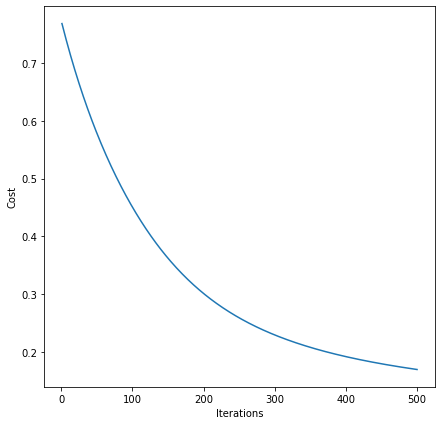

In [12]:
# Plotting the cost function against the number of iterations
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(iter)+1,loss)
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
fig.show()

## 3 Training a Deep Neural Network Using Mini-batch Gradient Descent
The following code implements mini-batch gradient descent to train a deep neural network of 2 hidden layers with 4 neurons in each hidden layer.

In [13]:
# Initialising the paramaters of the neural network with Xavier initialisation
W = [np.random.randn(4,3)*np.sqrt(1/3),np.random.randn(4,4)*np.sqrt(1/4),np.random.randn(1,4)*np.sqrt(1/4)]
b = [np.zeros((4,1)),np.zeros((4,1)),np.zeros((1,1))]

In [14]:
# Updating parameters using gradient descent
iter = 7
lr = 0.01
loss = np.array([])
L = 3
batch_size = 125
batch_num = Y.shape[1]//batch_size if Y.shape[1]%batch_size == 0 else Y.shape[1]//batch_size + 1

for i in np.arange(iter):
    
    for t in np.arange(batch_num):
        # Forward propagation
        Z = []
        A = []
        for l in np.arange(L):
            Z.append(W[l]@A[l-1]+b[l] if l> 0 else W[l]@X[:,t*batch_size:(t+1)*batch_size]+b[l])
            A.append(1/(1+np.exp(-Z[l])) if l==L-1 else np.tanh(Z[l]))

        # Back propagation
        dZ = [0]*L
        dA = [0]*L
        dW = [0]*L
        db = [0]*L
        
        p = X[:,t*batch_size:(t+1)*batch_size].shape[1]
        for l in np.arange(L-1,-1,-1):
            dZ[l] = A[l]-Y[:,t*batch_size:(t+1)*batch_size] if l==L-1 else dA[l]*(1-np.tanh(Z[l])**2)
            dA[l-1] = W[l].T@dZ[l] if l> 0 else 0
            dW[l] = 1/p*dZ[l]@A[l-1].T if l>0 else 1/p*dZ[l]@X[:,t*batch_size:(t+1)*batch_size].T
            db[l] = 1/p*np.sum(dZ[l],axis=1,keepdims=True)
            W[l] -= lr*dW[l]
            b[l] -= lr*db[l]

        current_loss = -1/p*(Y[:,t*batch_size:(t+1)*batch_size]@np.log(A[L-1]).T+(1-Y[:,t*batch_size:(t+1)*batch_size])@np.log(1-A[L-1]).T)
        loss = np.append(loss,current_loss)

print("Last iteration:",i+1)
print("Losses:",loss[-10:])

print("\nWeights and biases")
print("W1:",W[0])
print("b1:",b[0])
print("W2:",W[1])
print("b2:",b[1])
print("W3:",W[2])
print("b3:",b[2])

Last iteration: 7
Losses: [0.14723078 0.14347364 0.17608638 0.11557753 0.18164834 0.19197449
 0.19538856 0.11213093 0.1696175  0.20474217]

Weights and biases
W1: [[-0.98686431 -0.42306741 -0.61631859]
 [-0.58996657 -0.12886733 -0.13609302]
 [-0.0846785  -0.4897044   0.75335797]
 [ 0.64096899 -0.9374965   0.19305173]]
b1: [[-0.25885842]
 [ 0.05521485]
 [ 0.07191037]
 [ 0.22657051]]
W2: [[ 0.06030603 -0.07950256 -0.29595666 -0.65511613]
 [-0.37616011 -0.32466155  0.35236567 -0.29879915]
 [-0.10733643  0.36297075 -0.40509618  0.03775536]
 [ 0.5665607   0.25707539 -0.17918374 -0.32455401]]
b2: [[-0.48754087]
 [ 0.21907176]
 [ 0.47078024]
 [-0.41332897]]
W3: [[ 0.87418136 -0.30447514 -0.64243122  0.73078986]]
b3: [[-1.02821546]]


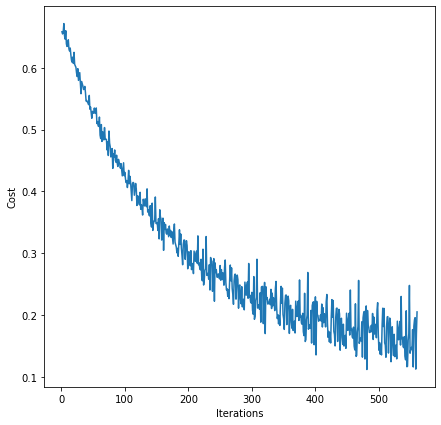

In [15]:
# Plotting the cost function against the number of iterations
fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(loss))+1,loss)
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
fig.show()

## 4 Training a Deep Neural Network Using Gradient Descent with Momentum
The following code implements mini-batch gradient descent with momentum to train a deep neural network of 2 hidden layers with 4 neurons in each hidden layer.

In [16]:
# Initialising the paramaters of the neural network with Xavier initialisation
W = [np.random.randn(4,3)*np.sqrt(1/3),np.random.randn(4,4)*np.sqrt(1/4),np.random.randn(1,4)*np.sqrt(1/4)]
b = [np.zeros((4,1)),np.zeros((4,1)),np.zeros((1,1))]

In [17]:
# Updating parameters using mini-batch gradient descent with momentum
iter = 7
lr = 0.01
B = 0.90
loss = np.array([])
L = 3
batch_size = 125
batch_num = Y.shape[1]//batch_size if Y.shape[1]%batch_size == 0 else Y.shape[1]//batch_size + 1

vdW = [0]*L
vdb = [0]*L
for i in np.arange(iter):
    
    for t in np.arange(batch_num):
        # Forward propagation
        Z = []
        A = []
        for l in np.arange(L):
            Z.append(W[l]@A[l-1]+b[l] if l> 0 else W[l]@X[:,t*batch_size:(t+1)*batch_size]+b[l])
            A.append(1/(1+np.exp(-Z[l])) if l==L-1 else np.tanh(Z[l]))

        # Back propagation
        dZ = [0]*L
        dA = [0]*L
        dW = [0]*L
        db = [0]*L
        
        p = X[:,t*batch_size:(t+1)*batch_size].shape[1]
        for l in np.arange(L-1,-1,-1):
            dZ[l] = A[l]-Y[:,t*batch_size:(t+1)*batch_size] if l==L-1 else dA[l]*(1-np.tanh(Z[l])**2)
            dA[l-1] = W[l].T@dZ[l] if l> 0 else 0
            dW[l] = 1/p*dZ[l]@A[l-1].T if l>0 else 1/p*dZ[l]@X[:,t*batch_size:(t+1)*batch_size].T
            db[l] = 1/p*np.sum(dZ[l],axis=1,keepdims=True)
            vdW[l] = B*vdW[l] + (1-B)*dW[l]
            vdb[l] = B*vdb[l] + (1-B)*db[l]
            W[l] -= lr*vdW[l]
            b[l] -= lr*vdb[l]

        current_loss = -1/p*(Y[:,t*batch_size:(t+1)*batch_size]@np.log(A[L-1]).T+(1-Y[:,t*batch_size:(t+1)*batch_size])@np.log(1-A[L-1]).T)
        loss = np.append(loss,current_loss)

print("Last iteration:",i+1)
print("Losses:",loss[-10:])

print("\nWeights and biases")
print("W1:",W[0])
print("b1:",b[0])
print("W2:",W[1])
print("b2:",b[1])
print("W3:",W[2])
print("b3:",b[2])

Last iteration: 7
Losses: [0.17620689 0.17569231 0.21034589 0.14031942 0.20804553 0.22558856
 0.22424672 0.13933065 0.20982896 0.24202853]

Weights and biases
W1: [[ 0.14697732  0.21744229 -0.5896062 ]
 [ 0.0762257   0.25801274  0.44590378]
 [-0.17551724  0.28357215  0.08182998]
 [ 0.86022629 -0.14938278 -0.97393529]]
b1: [[ 0.01745115]
 [-0.05210388]
 [ 0.54803601]
 [ 0.03221079]]
W2: [[ 0.2873721   0.04819048  0.0639596   0.72573391]
 [-0.32860164 -0.03528914  0.50085067 -0.06352588]
 [-0.29829999  0.16099291 -0.93922671 -0.32721775]
 [-1.03815538  0.05371631 -0.01027924 -0.34825454]]
b2: [[-0.05799354]
 [ 0.54038324]
 [-0.39558815]
 [-0.07514512]]
W3: [[ 0.07597159 -0.76910708  0.60483489  0.0938026 ]]
b3: [[-1.20669183]]


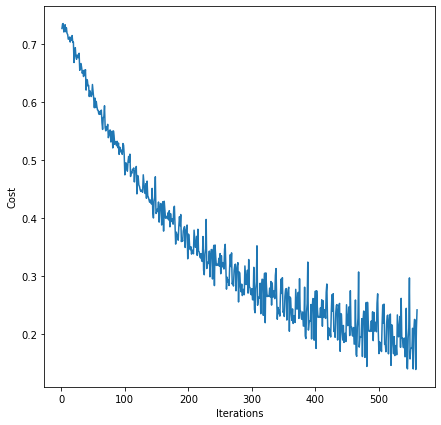

In [18]:
# Plotting the cost function against the number of iterations
fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(loss))+1,loss)
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
fig.show()

## 5 Training a Deep Neural Network Using RMSprop
The following code implements RMSprop to train a deep neural network of 2 hidden layers with 4 neurons in each hidden layer.

In [19]:
# Initialising the paramaters of the neural network with Xavier initialisation
W = [np.random.randn(4,3)*np.sqrt(1/3),np.random.randn(4,4)*np.sqrt(1/4),np.random.randn(1,4)*np.sqrt(1/4)]
b = [np.zeros((4,1)),np.zeros((4,1)),np.zeros((1,1))]

In [20]:
# Updating parameters using RMSprop
iter = 3
lr = 0.01
B = 0.999
loss = np.array([])
L = 3
batch_size = 125
batch_num = Y.shape[1]//batch_size if Y.shape[1]%batch_size == 0 else Y.shape[1]//batch_size + 1

sdW = [0]*L
sdb = [0]*L
for i in np.arange(iter):
    
    for t in np.arange(batch_num):
        # Forward propagation
        Z = []
        A = []
        for l in np.arange(L):
            Z.append(W[l]@A[l-1]+b[l] if l> 0 else W[l]@X[:,t*batch_size:(t+1)*batch_size]+b[l])
            A.append(1/(1+np.exp(-Z[l])) if l==L-1 else np.tanh(Z[l]))

        # Back propagation
        dZ = [0]*L
        dA = [0]*L
        dW = [0]*L
        db = [0]*L
        
        p = X[:,t*batch_size:(t+1)*batch_size].shape[1]
        for l in np.arange(L-1,-1,-1):
            dZ[l] = A[l]-Y[:,t*batch_size:(t+1)*batch_size] if l==L-1 else dA[l]*(1-np.tanh(Z[l])**2)
            dA[l-1] = W[l].T@dZ[l] if l> 0 else 0
            dW[l] = 1/p*dZ[l]@A[l-1].T if l>0 else 1/p*dZ[l]@X[:,t*batch_size:(t+1)*batch_size].T
            db[l] = 1/p*np.sum(dZ[l],axis=1,keepdims=True)
            sdW[l] = B*sdW[l] + (1-B)*dW[l]**2
            sdb[l] = B*sdb[l] + (1-B)*db[l]**2
            W[l] -= lr*dW[l]/np.sqrt(sdW[l]+1e-8)
            b[l] -= lr*db[l]/np.sqrt(sdb[l]+1e-8)

        current_loss = -1/p*(Y[:,t*batch_size:(t+1)*batch_size]@np.log(A[L-1]).T+(1-Y[:,t*batch_size:(t+1)*batch_size])@np.log(1-A[L-1]).T)
        loss = np.append(loss,current_loss)

print("Last iteration:",i+1)
print("Losses:",loss[-10:])

print("\nWeights and biases")
print("W1:",W[0])
print("b1:",b[0])
print("W2:",W[1])
print("b2:",b[1])
print("W3:",W[2])
print("b3:",b[2])

Last iteration: 3
Losses: [0.05457275 0.05209685 0.12702744 0.05131812 0.08751961 0.12765343
 0.17404675 0.02647706 0.09802963 0.09688442]

Weights and biases
W1: [[-0.56708459  0.68524827 -0.88451383]
 [-0.51984601  0.78679587  0.06654147]
 [-0.08391869 -0.7854356   0.13295898]
 [ 0.11264959  1.01803024  0.18059157]]
b1: [[ 0.25337451]
 [-1.00980976]
 [ 1.29674707]
 [-0.21975782]]
W2: [[ 0.14270456  0.76980893 -1.1860627  -0.31163099]
 [-0.3326398   1.58584749 -0.46351573 -0.32891861]
 [-0.67519355 -0.7084858  -0.18277544 -1.10626747]
 [ 0.54377595 -0.24841874  0.84139418 -1.11388464]]
b2: [[-1.00639618]
 [-0.98486314]
 [ 0.45682187]
 [ 0.40646207]]
W3: [[ 1.35258161  1.58171129 -1.76793732 -0.84913283]]
b3: [[-0.75065987]]


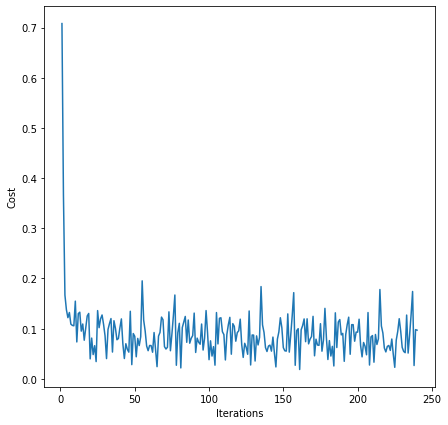

In [21]:
# Plotting the cost function against the number of iterations
fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(loss))+1,loss)
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
fig.show()

## 6 Training a Deep Neural Network Using Adam
The following code implements the Adam optimisation algorithm to train a deep neural network of 2 hidden layers with 4 neurons in each hidden layer.

In [22]:
# Initialising the paramaters of the neural network with Xavier initialisation
W = [np.random.randn(4,3)*np.sqrt(1/3),np.random.randn(4,4)*np.sqrt(1/4),np.random.randn(1,4)*np.sqrt(1/4)]
b = [np.zeros((4,1)),np.zeros((4,1)),np.zeros((1,1))]

In [23]:
# Updating parameters using Adam
iter = 3
lr = 0.01
B1 = 0.9
B2 = 0.999
loss = np.array([])
L = 3
batch_size = 125
batch_num = Y.shape[1]//batch_size if Y.shape[1]%batch_size == 0 else Y.shape[1]//batch_size + 1

vdW = [0]*L
vdb = [0]*L
sdW = [0]*L
sdb = [0]*L
for i in np.arange(iter):
    
    for t in np.arange(batch_num):
        # Forward propagation
        Z = []
        A = []
        for l in np.arange(L):
            Z.append(W[l]@A[l-1]+b[l] if l> 0 else W[l]@X[:,t*batch_size:(t+1)*batch_size]+b[l])
            A.append(1/(1+np.exp(-Z[l])) if l==L-1 else np.tanh(Z[l]))

        # Back propagation
        dZ = [0]*L
        dA = [0]*L
        dW = [0]*L
        db = [0]*L
        
        p = X[:,t*batch_size:(t+1)*batch_size].shape[1]
        for l in np.arange(L-1,-1,-1):
            dZ[l] = A[l]-Y[:,t*batch_size:(t+1)*batch_size] if l==L-1 else dA[l]*(1-np.tanh(Z[l])**2)
            dA[l-1] = W[l].T@dZ[l] if l> 0 else 0
            dW[l] = 1/p*dZ[l]@A[l-1].T if l>0 else 1/p*dZ[l]@X[:,t*batch_size:(t+1)*batch_size].T
            db[l] = 1/p*np.sum(dZ[l],axis=1,keepdims=True)
            vdW[l] = (B1*vdW[l] + (1-B1)*dW[l])
            vdb[l] = (B1*vdb[l] + (1-B1)*db[l])
            sdW[l] = (B2*sdW[l] + (1-B2)*dW[l]**2)
            sdb[l] = (B2*sdb[l] + (1-B2)*db[l]**2)
            W[l] -= lr*vdW[l]/np.sqrt(sdW[l]+1e-8)
            b[l] -= lr*vdb[l]/np.sqrt(sdb[l]+1e-8)

        current_loss = -1/p*(Y[:,t*batch_size:(t+1)*batch_size]@np.log(A[L-1]).T+(1-Y[:,t*batch_size:(t+1)*batch_size])@np.log(1-A[L-1]).T)
        loss = np.append(loss,current_loss)

print("Last iteration:",i+1)
print("Losses:",loss[-10:])

print("\nWeights and biases")
print("W1:",W[0])
print("b1:",b[0])
print("W2:",W[1])
print("b2:",b[1])
print("W3:",W[2])
print("b3:",b[2])

Last iteration: 3
Losses: [0.06056679 0.0560435  0.12537846 0.05174122 0.08459479 0.13027041
 0.18083305 0.01918797 0.09036606 0.101724  ]

Weights and biases
W1: [[ 0.12881752  0.32963268 -0.3614082 ]
 [ 0.1436395  -0.84272337  0.18904381]
 [ 0.45869002 -0.7715395  -0.16761518]
 [ 0.47875494  0.72969933 -0.68775163]]
b1: [[-0.90941981]
 [ 0.79071195]
 [ 0.78647139]
 [ 0.81031208]]
W2: [[-0.410006   -0.8803584  -0.81657261  0.97650021]
 [-0.23825809  1.10737891  1.37220687  1.43727781]
 [-0.80343827  1.32832338 -0.23657927 -0.34770782]
 [-0.1088727   0.16657936  1.11263545  0.32198861]]
b2: [[-0.5486044 ]
 [ 0.74449876]
 [ 0.79445291]
 [ 0.74224514]]
W3: [[ 1.60974907 -1.46926743 -0.67225836 -1.98052507]]
b3: [[-0.72620441]]


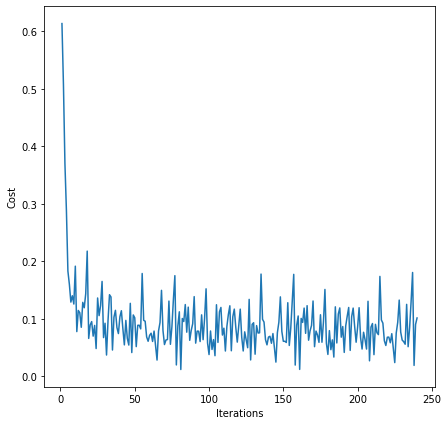

In [24]:
# Plotting the cost function against the number of iterations
fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(loss))+1,loss)
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
fig.show()

## Conclusion
The charts of cost functions versus the number of iterations show that the Adam optimisation algorithm is the quickest, followed by RMSprop, gradient descent with momentum and then mini-batch gradient descent. Each of these algorithms is dramatically faster than batch gradient descent.

Mini-batch gradient descent is quicker than batch gradient descent, but the cost function does not decrease monotonically and is subject to noise. This noise is supressed by the use of exponentially weighted averages in gradient descent with momentum.

RMSprop and Adam find the minimum of the cost function in dramatically fewer iterations than the other algorithms, but are subject to noise as well. This noise can be reduced by appropriate tuning of the beta values associated with these algorithms.